<a href="https://colab.research.google.com/github/Nikhilbhardwaj13/Calories-Burnt-Prediction/blob/main/Project_1_Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing


Importing the Dependencies


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection & Processesing


In [8]:
#loading the data from csv file to a Pandas DataFrame
calories=pd.read_csv('/content/calories.csv')

In [9]:
#print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [10]:
exersise=pd.read_csv('/content/exercise.csv')

In [11]:
exersise.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two DataFrames

In [12]:
calories_data=pd.concat([exersise,calories['Calories']],axis=1)

In [13]:
calories_data.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [14]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [15]:
#getting information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [16]:
#checking for missing values
calories_data.isnull().sum()


User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis


In [17]:
# get some statistical measures about the data
calories_data.describe()


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [18]:
sns.set()


<Axes: xlabel='count', ylabel='Gender'>

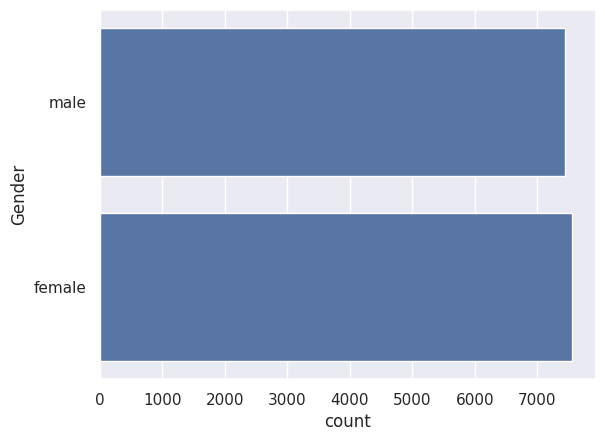

In [19]:
#plotting the gender cloumn in count plot
sns.countplot(calories_data['Gender'])

<ipython-input-20-e2b82495122e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

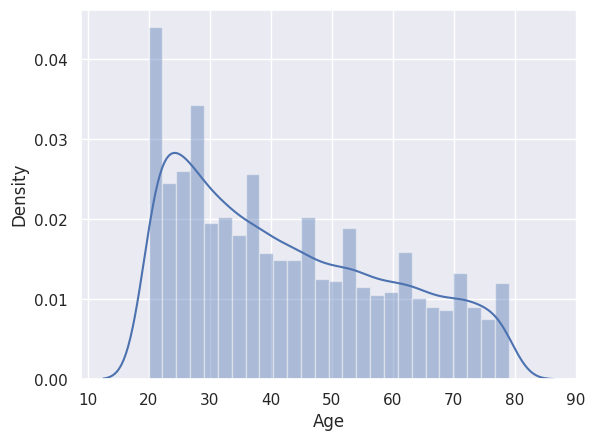

In [20]:
#finding the distribution of age coloumn
sns.distplot(calories_data['Age'])

<ipython-input-21-1425a5ad74c2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

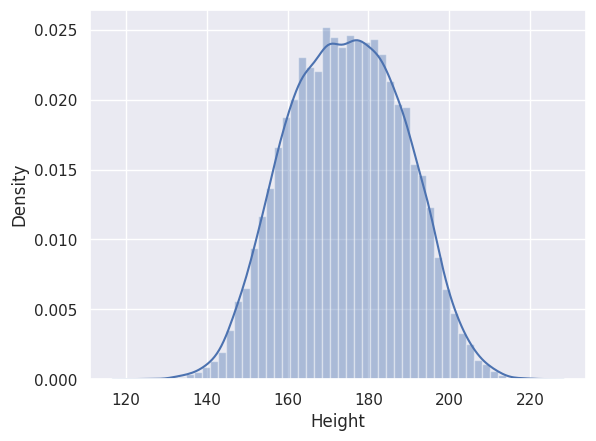

In [21]:
#finding the distribution of height coloumn
sns.distplot(calories_data['Height'])

<ipython-input-22-cf2eeb358ded>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

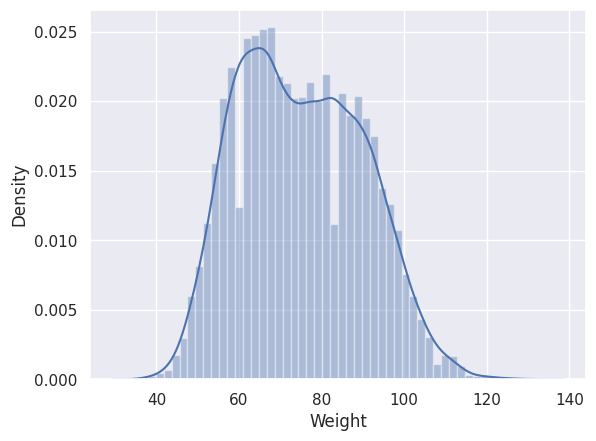

In [22]:
#finding the distribution of weight coloumn
sns.distplot(calories_data['Weight'])

Finding the Correlation in the dataset

1.Positive Correlation

2.Negative Correlation

In [23]:
# Convert categorical columns to numerical representations
calories_data_encoded = pd.get_dummies(calories_data, columns=['Gender'])  # Replace 'Gender' with the actual column name(s)

# Calculate correlations on the encoded DataFrame
correlation = calories_data_encoded.corr()
print(correlation)

                User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID        1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age           -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height        -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight        -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration      -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate    -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp      0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories      -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   
Gender_female  0.000687 -0.003222 -0.710534 -0.783186 -0.003440   -0.011555   
Gender_male   -0.000687  0.003222  0.710534  0.783186  0.003440    0.011555   

               Body_Temp  Calories  Gender_female  Gender_male  
User_ID         0.000923 -0.001661       0.000687    -0.000687  


<Axes: >

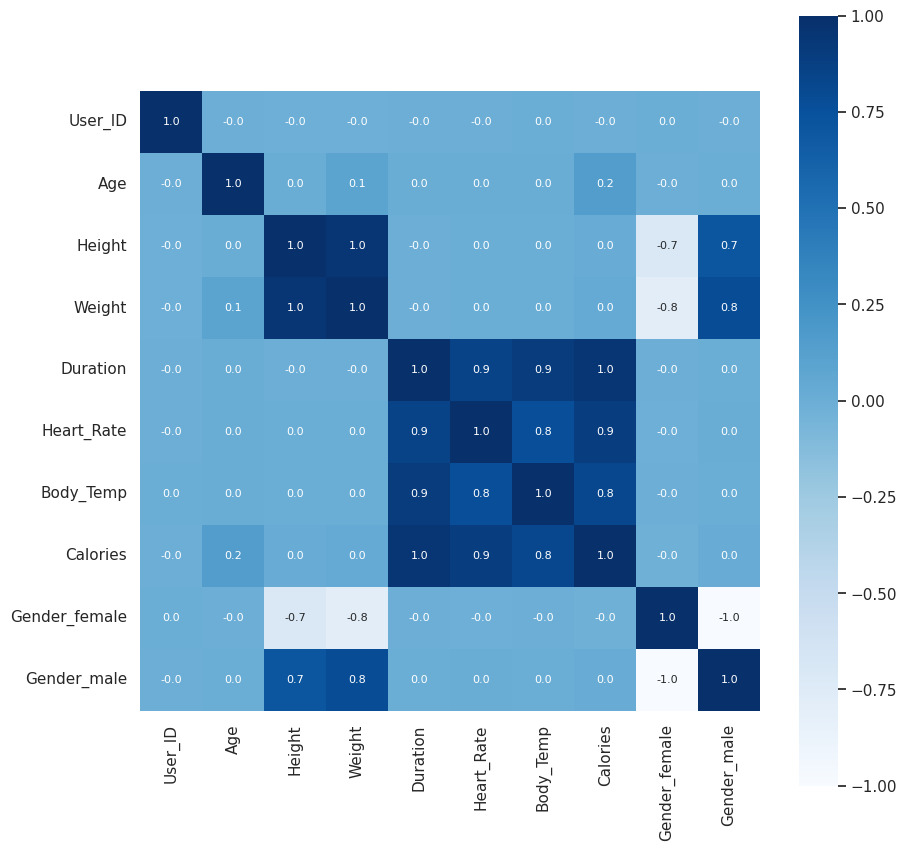

In [24]:
# constructing a heattmap to understandthe correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws= {'size':8}, cmap='Blues')

In [25]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [26]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Seperating Features and Target

In [27]:
x=calories_data.drop(columns=['User_ID','Calories'], axis=1)
y=calories_data['Calories']

In [28]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [29]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into Training data and Test data

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBoost Regressor

In [32]:
#loading the model
model=XGBRegressor()

In [33]:
#training the model with x_train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on Test Data

In [34]:
test_data_prediction=model.predict(x_test)

In [35]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Mean Absolute Error

In [36]:
mae=metrics.mean_absolute_error(y_test,test_data_prediction)

In [37]:
print("Mean Absolute Error= ",mae)

Mean Absolute Error=  1.4833678883314132


Bulding  a Predictive System

In [38]:
new_data = pd.DataFrame({
    'Gender': [1],  # Example input for encoded gender
    'Age': [30],  # Add age
    'Height': [175],  # Add height
    'Weight': [70],  # Add weight
    'Duration': [60],  # Example input
    'Heart_Rate': [110],  # Example input
    'Body_Temp': [36.5],  # Example input
})
predicted_calories = model.predict(new_data)
print(f"Predicted Calories: {predicted_calories[0]}")

Predicted Calories: 190.3155517578125


In [39]:
new_data = pd.DataFrame({
    'Gender': [0],  # Example input for encoded gender
    'Age': [24],  # Add age
    'Height': [154],  # Add height
    'Weight': [63],  # Add weight
    'Duration': [60],  # Example input
    'Heart_Rate': [110],  # Example input
    'Body_Temp': [36.5],  # Example input
})
predicted_calories = model.predict(new_data)
print(f"Predicted Calories: {predicted_calories[0]}")

Predicted Calories: 187.45574951171875
